<a href="https://colab.research.google.com/github/H-y-hoon/Prediction_of_Shared_Bike_Usage/blob/main/Bicycle_week1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DATA LOAD**
1.코랩 환경에서 아래의 코드 실행은 필수!!😀

-> 드라이브에서 파일을 가져오기 위하여 현재 파일과 드라이브를 연동시킨다.

In [ ]:
#구글 드라이브와 mount(연결)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##**1. 라이브러리 호출**

- **라이브러리(library)**는 여러 패키지와 모듈들을 모아놓은 것을 의미한다.

- 파이썬의 대표적인 라이브러리는 시각화 라이브러리인 **matplotlib**과 머신러닝 라이브러리인 **pytorch**가 있다.

- **패키지(package)**는 특정 기능과 관련된 여러 모듈을 한 폴더 안에 넣어 관리하는데 이를 패키지라고 한다. 예를 들어 Test라는 폴더 안에 __init__.py, test.py와 같은 파일들이 모여있는 것이다.

- 패키지의 예로는 **판다스(pandas)**와 **넘파이(numpy)**가 있다.

- **모듈(module)**은 함수, 변수, 클래스를 모아놓은 것을 말한다. 일반적으로 한 파일을 말하는데 예를 들어 .py와 같은 하나의 파일 안에 함수와 변수, 클래스가 모여있는 것으로 볼 수 있다. 

- 결론적으로 라이브러리 >= 패키지 >= 모듈로 볼 수 있다.

##**2. Pandas 소개**
pandas 는 python 의 대표적인 데이터 분석용 라이브러리이다. 이를 활용하여 데이터를 구조화하고 조작할 수 있다.

먼저 pandas 를 불러와 보자!

보통 numpy 와 함께 로드하며, 각각 pd와 np 라는 별명을 주로 사용한다.

In [ ]:
#import 모듈 as 줄임말
import pandas as pd
import numpy as np

# 시각화를 위한 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns

#### **2-1. pandas DataFrame**
pandas 는 DataFrame 과 Series 의 데이터 구조를 갖는다.

DataFrame (DF) 은 표 형태의 2차원 데이터 구조로, 행(인덱스), 열, 데이터 를 갖습니다. Series 는 1차원의 데이터 구조로 인덱스와 데이터만 갖는다.

그러니까, 다음과 같이 DF가 존재할 때, 각 열은 Series 로 생각해볼 수 있다.


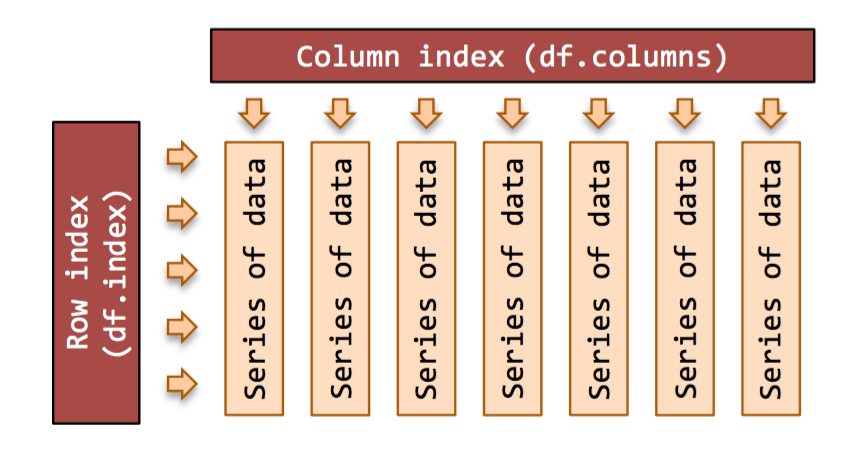

In [ ]:
# train 데이터 불러오기
train = pd.read_csv('/content/drive/MyDrive/2023_따릉이_스터디/train.csv')

# test 데이터 불러오기
test = pd.read_csv('/content/drive/MyDrive/2023_따릉이_스터디/test.csv')

# submission데이터 불러오기
sub = pd.read_csv('/content/drive/MyDrive/2023_따릉이_스터디/sample_submission.csv')

##**3. 데이터 확인하기**
여러 함수를 사용하여 데이터를 확인해보자.

___________________________________________
**1. bicycle_train.csv : 학습 데이터**

date_time : 일별 날짜

wind_direction: 풍향 (degree)

sky_condition : 하늘 상태 (하단 설명 참조)

precipitation_form : 강수 형태 (하단 설명 참조)

wind_speed : 풍속 (m/s)

humidity : 습도 (%)

low_temp : 최저 기온 ( `C)

high_temp : 최고 기온 ( `C)

Precipitation_Probability : 강수 확률 (%)

number_of_rentals : 따릉이 대여량

In [ ]:
#type 함수로 데이터타입 확인

print(type(train))
print(type(test))
print(type(sub))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [ ]:
#shape 함수로 데이터크기 확인

print(train.shape)
print(test.shape)
print(sub.shape)

(273, 10)
(91, 9)
(91, 2)


In [ ]:
train

,date_time,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,number_of_rentals
0,2018-04-01,207.500,4.000,0.000,3.050,75.000,12.600,21.000,30.000,22994
1,2018-04-02,208.317,2.950,0.000,3.278,69.833,12.812,19.000,19.500,28139
2,2018-04-03,213.516,2.911,0.000,2.690,74.879,10.312,15.316,19.113,26817
3,2018-04-04,143.836,3.692,0.425,3.138,71.849,8.312,12.368,43.493,26034
4,2018-04-05,95.905,4.000,0.723,3.186,73.784,5.875,10.421,63.378,2833
...,...,...,...,...,...,...,...,...,...,...
268,2020-06-26,228.662,3.980,0.223,2.271,78.378,20.500,27.526,36.486,96150
269,2020-06-27,207.770,2.865,0.081,1.794,78.412,20.812,28.842,21.081,107001
270,2020-06-28,282.568,1.730,0.000,1.820,72.736,21.000,29.053,7.297,98568
271,2020-06-29,137.027,2.257,0.088,2.043,70.473,19.625,26.000,15.541,70053


train에 read_csv 함수의 결과가 들어갔다. 
csv 는 comma seperated values 의 약자로, 쉼표로 구분한 데이터의 형태를 의미한다.
쉽게 생각하면, 엑셀의 내용만 저장한 형태가 되는 것이다.

- type 로 확인해보면 DataFrame인 것을 알 수 있다. 그러니까, read_csv 의 결과는 DF가 된다 를 기억하자! 😸

- ... 은 데이터가 생략되어 있음을 의미한다.

- Python 의 규칙에 따라, 숫자는 0부터 세는 것을 기억하자.

보통 데이터 전체를 출력하는 경우는 많지 않고, 일부분만 봄. (화면에 다 안 나오니까ㅋㅋ)

In [ ]:
#데이터 구경하기
train.head()

,date_time,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,number_of_rentals
0,2018-04-01,207.500,4.000,0.000,3.050,75.000,12.600,21.000,30.000,22994
1,2018-04-02,208.317,2.950,0.000,3.278,69.833,12.812,19.000,19.500,28139
2,2018-04-03,213.516,2.911,0.000,2.690,74.879,10.312,15.316,19.113,26817
3,2018-04-04,143.836,3.692,0.425,3.138,71.849,8.312,12.368,43.493,26034
4,2018-04-05,95.905,4.000,0.723,3.186,73.784,5.875,10.421,63.378,2833


In [ ]:
#디폴트값은 5 
#가로안에 원하는 숫자를 넣어서 데이터를 확인할 수 있다.

train.head(10)

,date_time,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability
0,2021-04-01,108.833,3.000,0.000,2.900,28.333,11.800,20.667,18.333
1,2021-04-02,116.717,3.850,0.000,2.662,46.417,12.000,19.000,28.500
2,2021-04-03,82.669,4.000,0.565,2.165,77.258,8.875,16.368,52.847
3,2021-04-04,44.123,3.466,0.466,3.747,63.288,6.250,17.368,37.671
4,2021-04-05,147.791,1.500,0.000,1.560,48.176,7.188,18.684,4.459
5,2021-04-06,248.297,2.655,0.000,1.780,55.574,7.250,19.053,17.095
6,2021-04-07,266.865,1.000,0.000,1.979,54.696,5.625,17.947,0.000
7,2021-04-08,283.142,1.000,0.000,2.570,48.378,6.312,17.632,0.000
8,2021-04-09,170.541,1.014,0.000,1.159,44.662,7.250,18.579,0.068
9,2021-04-10,202.155,1.351,0.000,2.155,50.811,8.562,19.474,2.432


In [ ]:
#tail함수를 사용하여 최하단 데이터를 확인해보자

train.tail()

,date_time,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,number_of_rentals
268,2020-06-26,228.662,3.980,0.223,2.271,78.378,20.500,27.526,36.486,96150
269,2020-06-27,207.770,2.865,0.081,1.794,78.412,20.812,28.842,21.081,107001
270,2020-06-28,282.568,1.730,0.000,1.820,72.736,21.000,29.053,7.297,98568
271,2020-06-29,137.027,2.257,0.088,2.043,70.473,19.625,26.000,15.541,70053
272,2020-06-30,120.797,3.622,0.432,5.574,77.061,19.125,26.053,41.284,38086


**2. bicycle_test.csv : 테스트 데이터**

date_time : 일별 날짜

wind_direction: 풍향

sky_condition : 하늘 상태

precipitation_form : 강수 형태

wind_speed : 풍속

humidity : 습도

low_temp : 최저 기온

high_temp : 최고 기온

Precipitation_Probability : 강수 확률


In [ ]:
#test 데이터 확인

test.head()

,date_time,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability
0,2021-04-01,108.833,3.000,0.000,2.900,28.333,11.800,20.667,18.333
1,2021-04-02,116.717,3.850,0.000,2.662,46.417,12.000,19.000,28.500
2,2021-04-03,82.669,4.000,0.565,2.165,77.258,8.875,16.368,52.847
3,2021-04-04,44.123,3.466,0.466,3.747,63.288,6.250,17.368,37.671
4,2021-04-05,147.791,1.500,0.000,1.560,48.176,7.188,18.684,4.459


In [ ]:
test.tail()

,date_time,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability
86,2021-06-26,177.149,3.980,0.223,1.066,74.628,20.312,28.579,36.486
87,2021-06-27,138.723,2.777,0.135,1.290,70.236,20.812,29.000,18.378
88,2021-06-28,111.095,3.338,1.270,1.692,70.338,21.000,28.789,35.946
89,2021-06-29,171.622,3.270,0.595,1.470,70.473,21.000,29.421,27.770
90,2021-06-30,181.709,3.270,0.703,1.180,75.203,21.500,30.211,29.054


**3. sample_submissoin.csv : 제출 양식**

date_time : 일별 날짜

number_of_rentals : 따릉이 대여량

In [ ]:
#submisssion 데이터 확인
sub.head()

,date_time,number_of_rentals
0,2021-04-01,0
1,2021-04-02,0
2,2021-04-03,0
3,2021-04-04,0
4,2021-04-05,0


####**3-1. 데이터 형식**

pandas 의 데이터 형식은 다음과 같은 종류가 있다.

각 컬럼이 어떤 형식인지 정확하게 아는 것이 중요하니 주의해서 보자.

결측치를 표시할 수 있는지 여부에 따라 달라진다.
(결측치는 추후 설명...)

* float : 부동소수점 (결측치 O) 
* int : 정수 (결측치 X)
* Int64 : 정수 (결측치 O)
* object : 문자열
* category : 범주형 (결측치 O)
* bool : 불리언 (결측치 X)
* boolean : 불리언 (결측치 O)
* datetime64 : 날짜 (결측치 O)

DF.dtypes 로 확인할 수 있다.

In [ ]:
print(train.dtypes)
print('\n')
print(test.dtypes)

date_time                     object
wind_direction               float64
sky_condition                float64
precipitation_form           float64
wind_speed                   float64
humidity                     float64
low_temp                     float64
high_temp                    float64
Precipitation_Probability    float64
number_of_rentals              int64
dtype: object


date_time                     object
wind_direction               float64
sky_condition                float64
precipitation_form           float64
wind_speed                   float64
humidity                     float64
low_temp                     float64
high_temp                    float64
Precipitation_Probability    float64
dtype: object


info함수를 사용해도 비슷한 결과를 낼 수 있다.

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date_time                  273 non-null    object 
 1   wind_direction             273 non-null    float64
 2   sky_condition              273 non-null    float64
 3   precipitation_form         273 non-null    float64
 4   wind_speed                 273 non-null    float64
 5   humidity                   273 non-null    float64
 6   low_temp                   273 non-null    float64
 7   high_temp                  273 non-null    float64
 8   Precipitation_Probability  273 non-null    float64
 9   number_of_rentals          273 non-null    int64  
dtypes: float64(8), int64(1), object(1)
memory usage: 21.5+ KB


describe 함수를 이용하여 기술통계량을 확인해보자.

- describe 함수는 numpy 라이브러리를 통하여 사용할 수 있다,

- 기술통계량이란 데이터 집합에 대한 간단한 통계를 볼 수 있다.

row별 의미

Count : 컬럼별 총 데이터수

mean / std :  컬럼별 데이터의 평균 / 표준편차

min / max  :  컬럼별 데이터 최소값 / 최대값

25% / 50% / 75% : 백분위수의 각 지점으로, 분포를 반영해 평균을 보완하는 목적으로 사용

In [ ]:
train.describe()

,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,number_of_rentals
count,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000
mean,202.750967,2.288256,0.100963,2.480963,56.745491,13.795249,23.384733,16.878103,59574.978022
std,56.659232,0.961775,0.203193,0.884397,12.351268,5.107711,5.204605,16.643772,27659.575774
min,57.047000,1.000000,0.000000,0.753000,24.831000,1.938000,9.895000,0.000000,1037.000000
25%,171.541000,1.405000,0.000000,1.820000,47.196000,9.938000,19.842000,4.054000,36761.000000
50%,209.774000,2.167000,0.000000,2.411000,55.845000,14.375000,24.158000,12.162000,63032.000000
75%,238.412000,3.000000,0.088000,2.924000,66.419000,18.000000,27.526000,22.973000,81515.000000
max,321.622000,4.000000,1.000000,5.607000,88.885000,22.312000,33.421000,82.162000,110377.000000


특정 컬럼/시리즈의 요약 정보를 확인할 경우

In [ ]:
train['wind_direction'].describe()

count    273.000000
mean     202.750967
std       56.659232
min       57.047000
25%      171.541000
50%      209.774000
75%      238.412000
max      321.622000
Name: wind_direction, dtype: float64

#**1주차 수고하셨습니다:)**